In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [158]:
df=pd.read_csv('F:/imarticus/imarticus machine learning---lms/knn..lms/Market Positioning of Mobile/Dataset/mobile_data.csv')

In [159]:
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [160]:
numerical_features = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))
print(numerical_features)
# Pulling out names of categorical variables by conditioning dtypes equal to object type
categorical_features = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))
print(categorical_features)

Number of Numerical features:  15
Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')
Number of Categorical features:  0
Index([], dtype='object')


In [161]:
import seaborn as sns

In [162]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

# box plot to see outliers

<AxesSubplot:>

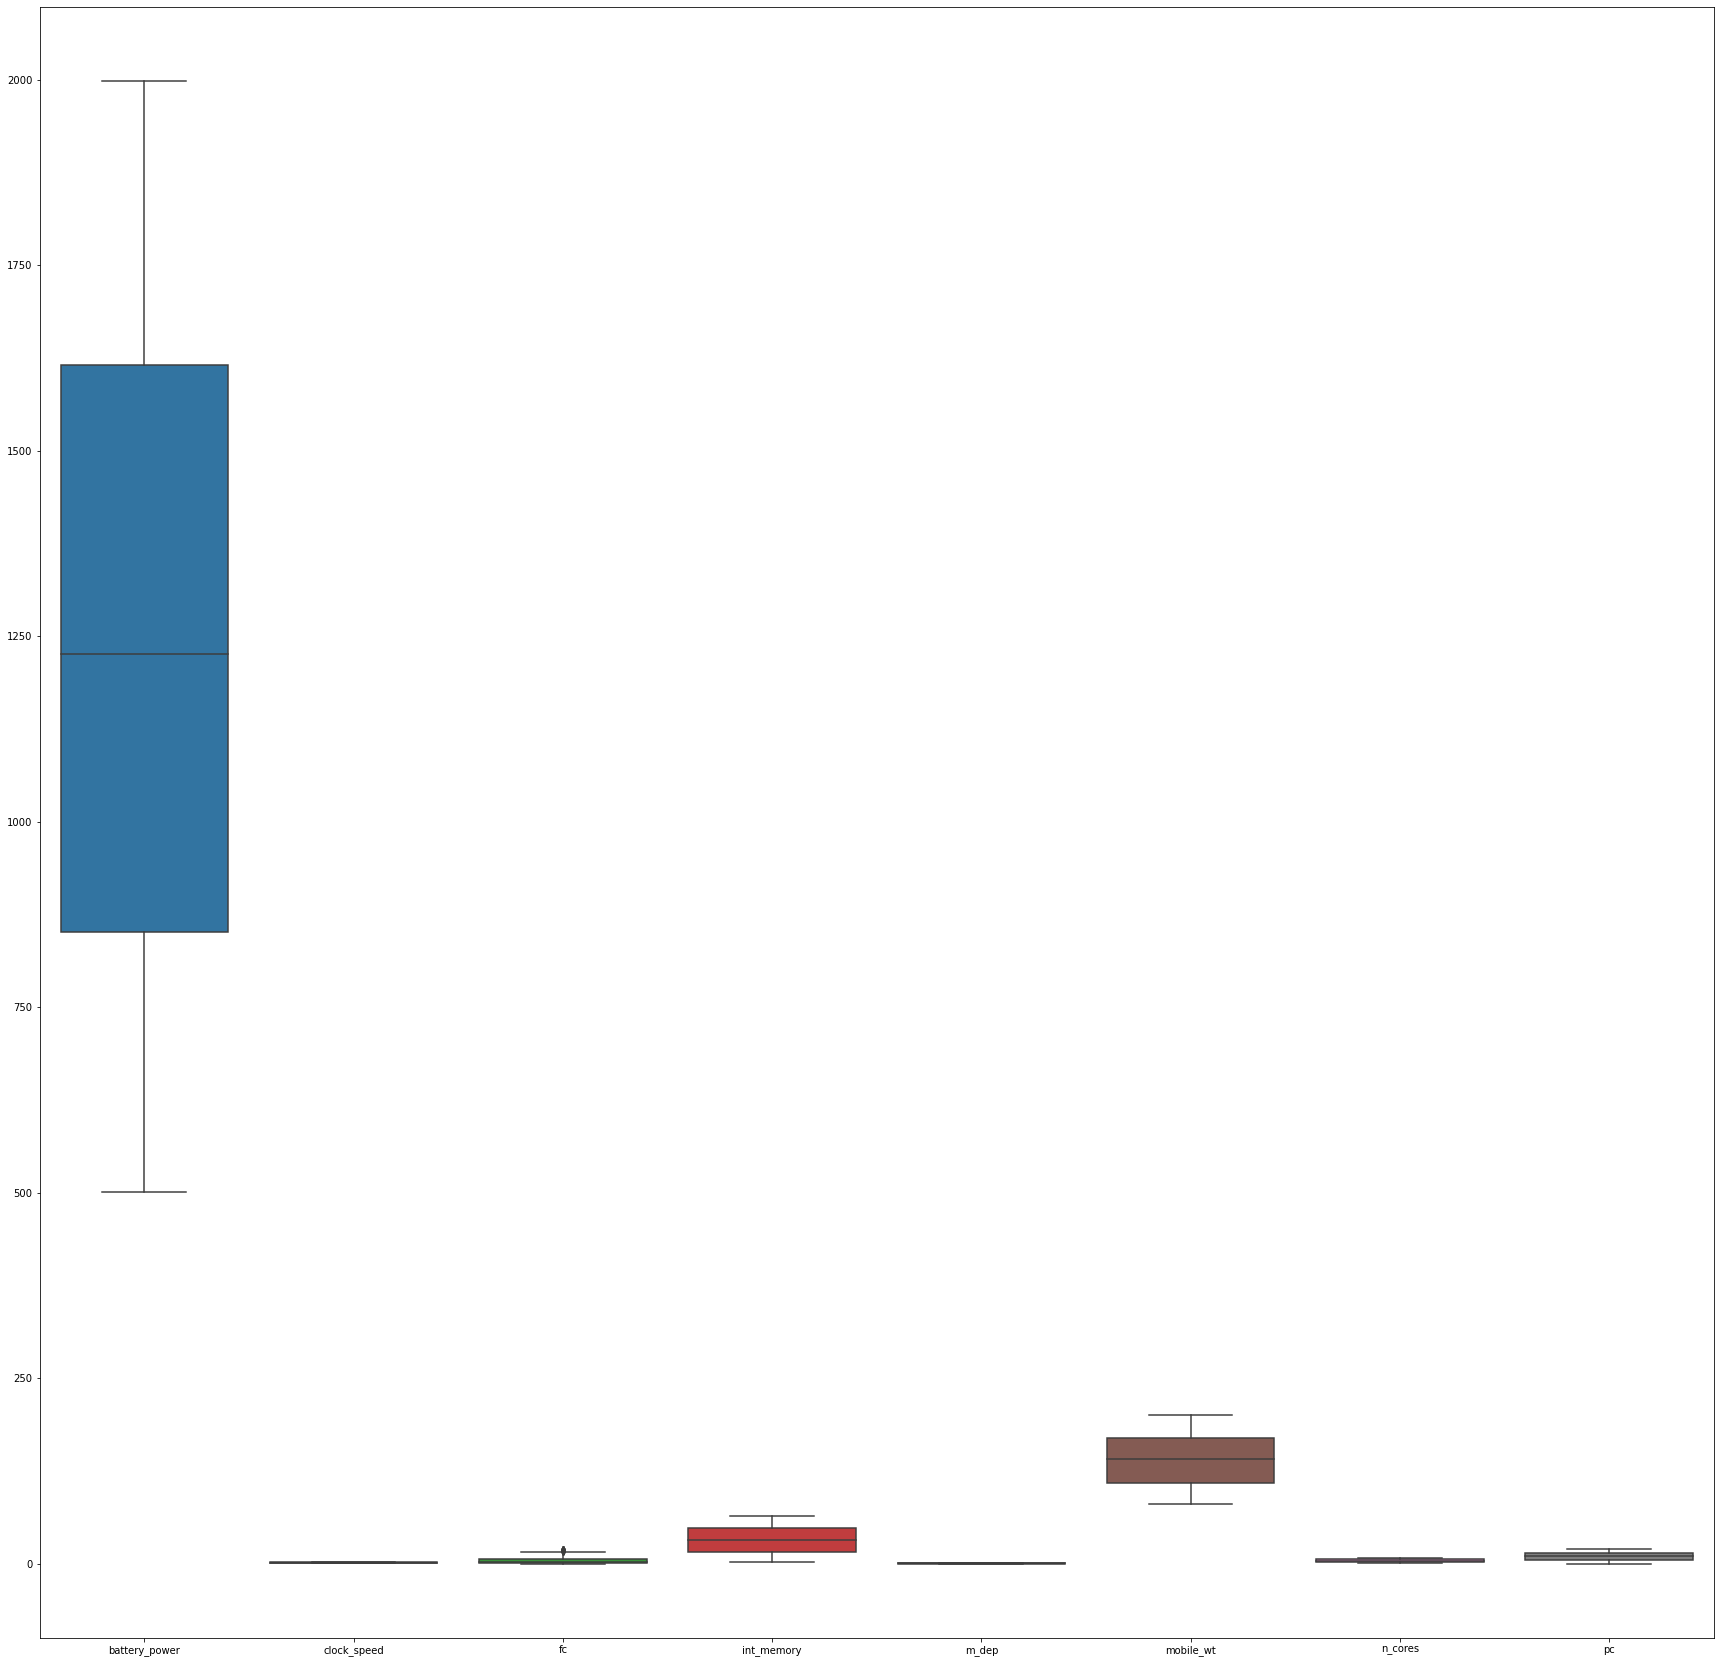

In [163]:
fig=plt.figure(figsize=(30,30))
sns.boxplot(data=df[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc']])

# box plot to see outliers

<AxesSubplot:>

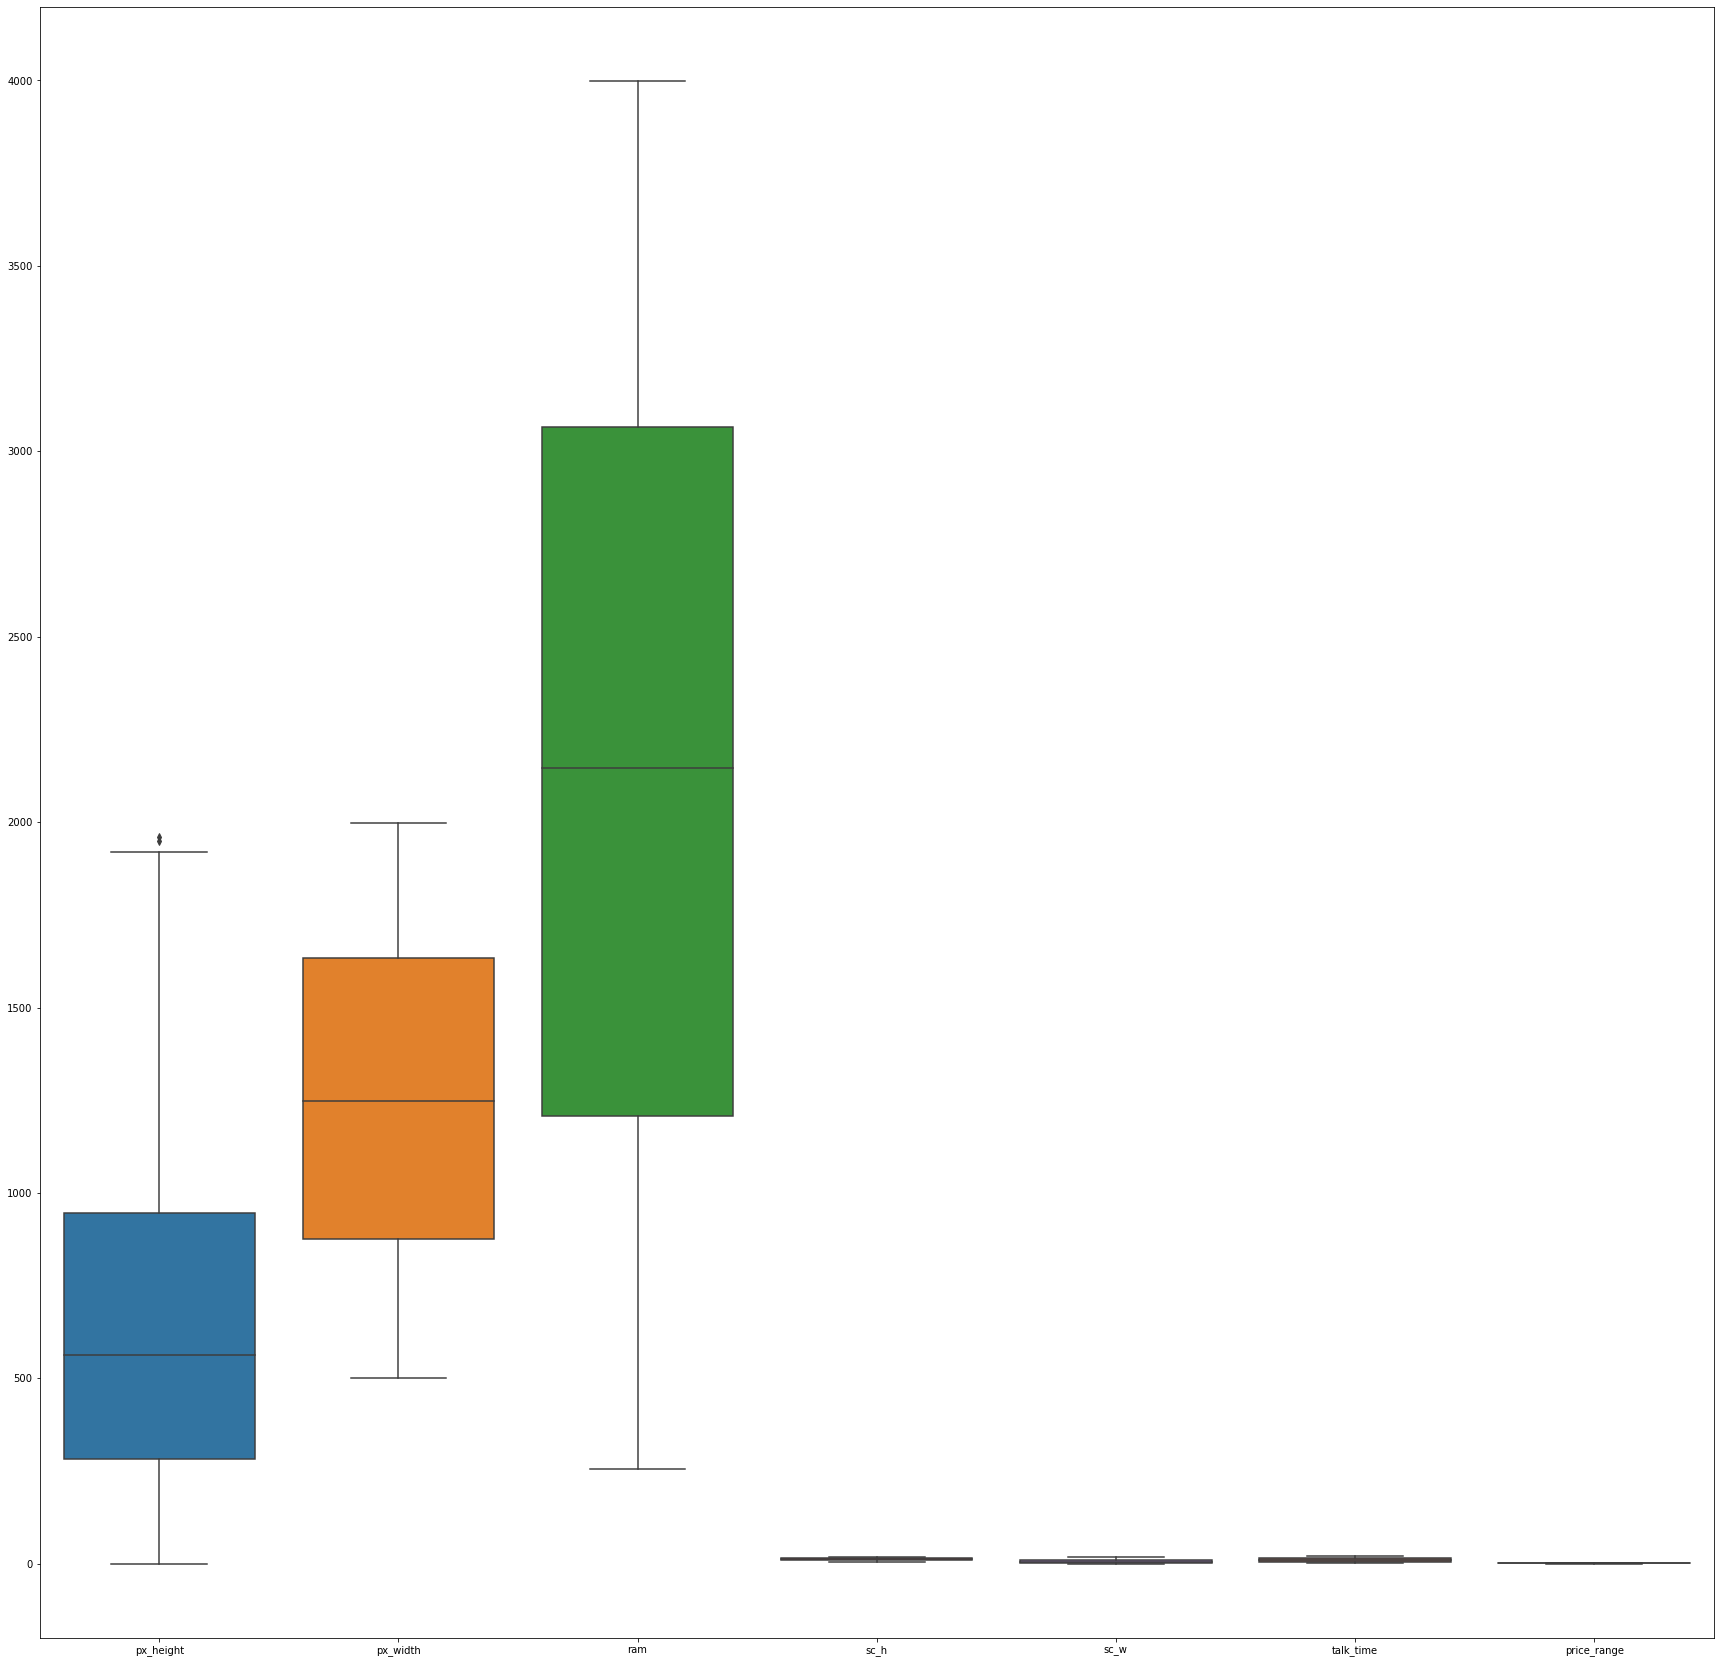

In [164]:
fig=plt.figure(figsize=(30,30))
sns.boxplot(data=df[['px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range']])

In [165]:
df.shape

(2000, 15)

# Outlier Removing

In [166]:
import sklearn
import pandas as pd
  
''' Detection '''
# IQR
Q1 = np.percentile(df[['px_height','fc']], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df[['px_height','fc']], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df[['px_height','fc']] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df[['px_height','fc']] <= (Q1-1.5*IQR))
  
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape) 

Old Shape:  (2000, 15)
New Shape:  (1865, 15)


# Check if any features are related to each other

In [167]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr

In [168]:
corr_features = correlation(df,0.85)
len(set(corr_features))

1

In [169]:
corr_features

{'price_range'}

# independent and dependent variable

In [170]:
x=df.iloc[:,:-1].values
y=df.iloc[:,14].values

In [171]:
x

array([[8.420e+02, 2.200e+00, 1.000e+00, ..., 9.000e+00, 7.000e+00,
        1.900e+01],
       [1.021e+03, 5.000e-01, 0.000e+00, ..., 1.700e+01, 3.000e+00,
        7.000e+00],
       [5.630e+02, 5.000e-01, 2.000e+00, ..., 1.100e+01, 2.000e+00,
        9.000e+00],
       ...,
       [1.911e+03, 9.000e-01, 1.000e+00, ..., 9.000e+00, 1.000e+00,
        5.000e+00],
       [1.512e+03, 9.000e-01, 4.000e+00, ..., 1.800e+01, 1.000e+01,
        1.900e+01],
       [5.100e+02, 2.000e+00, 5.000e+00, ..., 1.900e+01, 4.000e+00,
        2.000e+00]])

In [172]:
y

array([1, 2, 2, ..., 3, 0, 3], dtype=int64)

# train_test_split

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [175]:
from sklearn.preprocessing import StandardScaler 

In [176]:
scaler = StandardScaler()

In [177]:
scaler.fit(x_train)

StandardScaler()

In [178]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# building knn model

In [179]:
from sklearn.neighbors import KNeighborsClassifier

In [180]:
classifier = KNeighborsClassifier(n_neighbors =15)

In [181]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [182]:
y_pred = classifier.predict(x_test)

In [183]:
# Eva;auting the algorithm
from sklearn.metrics import classification_report, confusion_matrix


In [184]:
print(confusion_matrix(y_test, y_pred))

[[79 27  1  0]
 [25 36 23  1]
 [ 5 22 60 10]
 [ 0  4 33 47]]


In [185]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       107
           1       0.40      0.42      0.41        85
           2       0.51      0.62      0.56        97
           3       0.81      0.56      0.66        84

    accuracy                           0.60       373
   macro avg       0.61      0.58      0.59       373
weighted avg       0.62      0.60      0.60       373



In [186]:
error = []
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i=knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

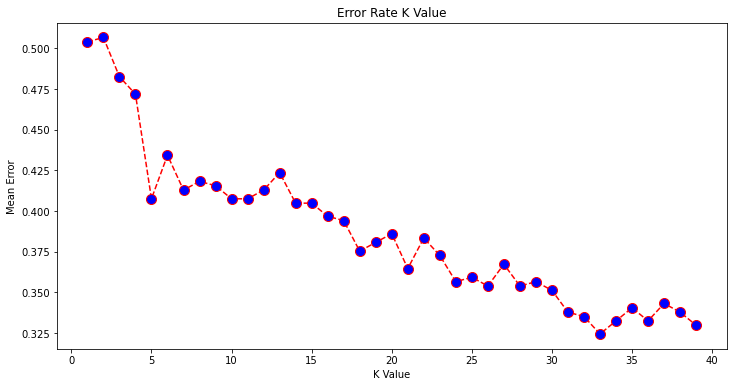

In [187]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# RandomizedSearchCV

In [188]:
import numpy as np

In [189]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1,40)}
#use gridsearch to test all values for n_neighbors
knn_gscv =RandomizedSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [190]:
knn_gscv.best_params_

{'n_neighbors': 35}

In [191]:
knn_gscv.best_score_

0.6702251352382662

# apply parameter n_neighbors =35 which we got from RandomizedSerchCV to build knn model

In [192]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors =35)
classifier1.fit(x_train,y_train)
y_pred1 = classifier1.predict(x_test)
from sklearn.metrics import classification_report
result1 = classification_report(y_test, y_pred1)
print(result1)

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       107
           1       0.53      0.47      0.50        85
           2       0.55      0.69      0.61        97
           3       0.78      0.61      0.68        84

    accuracy                           0.66       373
   macro avg       0.66      0.65      0.65       373
weighted avg       0.67      0.66      0.66       373



# hence their is increase in accuracy from 0.60 to 0.66